In [10]:
train_split=20000
from torchnlp.datasets import imdb_dataset
train = imdb_dataset(train=True)
test= imdb_dataset(test=True)
train[:2]
test[:2]

[{'text': "Ok, everybody agreed on what was the best season. The first. And killing off Boone was a bad desicion. Also killing off others was bad. Blame the directors and writers for it. Bad boys. BUT. I still think this is the best scifi series ever! Sorry guys I can't help it! I see that the quality of the series was decreasing after the first season. Still it's easy to accept Liam as the new main character, if you are over Boone. He is really... mysterious. The thing that shocked me most was when Lilli was written out of the story and how. That was something she didn't deserve! And what do we get? Some blonde chick called Renee, with absolutely no character! But these Taelons stay mysterious, and you stay wondering about theyre true plans till the end. True Suspence. The conversations between Zo'or and Da'an are sometimes brilliant.<br /><br />I understand that, when you jump in on an episode from the 3th,4th or 5th season, you may not understand this show. But when you watch from t

In [12]:
import pickle as pkl

pkl.dump(train,open("train.pkl","wb"))
pkl.dump(test,open("test.pkl","wb"))

In [261]:
train=pkl.load(open("train.pkl","rb"))
test=pkl.load(open("test.pkl","rb"))

train_split=20000

training=train[:train_split//2]+train[12500:12500+train_split//2]
train_data=[]
train_target=[]
for sample in training:
    train_data+=[sample['text']]
    if sample['sentiment']=='pos':      #setting the targets to integers: 1 if positive and 0 if negative
        train_target+=[1]
    else:
        train_target+=[0]

validation=train[train_split//2:12500]+train[12500+train_split//2:]
val_data=[]
val_target=[]
for sample in validation:
    val_data+=[sample['text']]
    if sample['sentiment']=='pos':
        val_target+=[1]
    else:
        val_target+=[0]

test_data=[]
test_target=[]
for sample in test:
    test_data+=[sample["text"]]
    if sample['sentiment']=='pos':
        test_target+=[1]
    else:
        test_target+=[0]
print(len(train_data))
print(len(val_data))
print(len(test_data))

20000
Justifications for what happened to his movie in terms of distributors and secondary directors, drunks and receptionists doing script rewrites aside, let's just take this movie as it's offered, without extraneous explanations.<br /><br />This movie is God awful. Straight up craptastic. Rather than rehash what may serve as a plot, I'll run a highlight reel of some curious points that made me scratch my head.<br /><br />A class (of 5) take a field trip for a history class to the middle of friggin' nowhere Ireland. These students may be Canadian or American, it's difficult to tell. That it was filmed in a Canadian forest rather than Ireland is rather obvious as well. One student seems to know nothing about history and is basically the "dumb jock" character from a number of kick ass 80's movie, except when he channels Randy from Scream. One character may be Chris Klein's stunt double. He has a girlfriend who probably gets killed, but it's never really established if that is true. One

In [59]:
import spacy
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

porter_stemmer=PorterStemmer()

tokenizer = spacy.load('en_core_web_sm')
punctuations = list(string.punctuation)

def tokenize(sent):
  tokens = tokenizer(sent)
  unwanted=set(list(punctuations)+['<br','/><br','\n','\t'])
  return [porter_stemmer.stem(token.text.lower()) for token in tokens if (token.text not in unwanted)]
  
  #return [token.text for token in tokens]

In [60]:
import pickle as pkl

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens_stem_punct.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens_stem_punct.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens_stem_punct.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens_stem_punct.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [61]:
import pickle as pkl
from nltk.corpus import stopwords

train_data_tokens = pkl.load(open("train_data_tokens_stem_punct.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens_stem_punct.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens_stem_punct.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens_stem_punct.p", "rb"))

#bigrams
bigram_train_data_tokens=[]
for review in train_data_tokens:
    temp=[]
    for i in range(len(review)-1):
        temp.append(review[i]+"_"+review[i+1])
    bigram_train_data_tokens.append(review+temp)

bigram_val_data_tokens=[]
for review in val_data_tokens:
    temp=[]
    for i in range(len(review)-1):
        temp.append(review[i]+"_"+review[i+1])
    bigram_val_data_tokens.append(review+temp)

bigram_test_data_tokens=[]
for review in test_data_tokens:
    temp=[]
    for i in range(len(review)-1):
        temp.append(review[i]+"_"+review[i+1])
    bigram_test_data_tokens.append(review+temp)

temp_list=[]
bi_gram_vocab=[]
for i in range(len(all_train_tokens)-1):
    temp_list.append(all_train_tokens[i]+"_"+all_train_tokens[i+1])
bi_gram_vocab=all_train_tokens+temp_list

#trigrams    
trigram_train_data_tokens=[] 
trigrams_train=[]
for review in train_data_tokens:
    temp=[]
    for i in range(len(review)-2):
        temp.append(review[i]+"_"+review[i+1]+"_"+review[i+2])
    trigrams_train.append(temp)
for i in range(len(bigram_train_data_tokens)):
    trigram_train_data_tokens.append(bigram_train_data_tokens[i]+trigrams_train[i])
    

trigram_val_data_tokens=[] 
trigrams_val=[]
for review in val_data_tokens:
    temp=[]
    for i in range(len(review)-2):
        temp.append(review[i]+"_"+review[i+1]+"_"+review[i+2])
    trigrams_val.append(temp)
for i in range(len(bigram_val_data_tokens)):
    trigram_val_data_tokens.append(bigram_val_data_tokens[i]+trigrams_val[i])

trigram_test_data_tokens=[] 
trigrams_test=[]
for review in test_data_tokens:
    temp=[]
    for i in range(len(review)-2):
        temp.append(review[i]+"_"+review[i+1]+"_"+review[i+2])
    trigrams_test.append(temp)
for i in range(len(bigram_test_data_tokens)):
    trigram_test_data_tokens.append(bigram_test_data_tokens[i]+trigrams_test[i])
    
temp_list_tri=[]
tri_gram_vocab=[]
for i in range(len(all_train_tokens)-2):
    temp_list_tri.append(all_train_tokens[i]+"_"+all_train_tokens[i+1]+"_"+all_train_tokens[i+2])
tri_gram_vocab=bi_gram_vocab + temp_list_tri


#fourgrams
    
fourgram_train_data_tokens=[] 
fourgrams_train=[]
for review in train_data_tokens:
    temp=[]
    for i in range(len(review)-3):
        temp.append(review[i]+"_"+review[i+1]+"_"+review[i+2]+"_"+review[i+3])
    fourgrams_train.append(temp)
for i in range(len(trigram_train_data_tokens)):
    fourgram_train_data_tokens.append(trigram_train_data_tokens[i]+fourgrams_train[i])
    

fourgram_val_data_tokens=[] 
fourgrams_val=[]
for review in val_data_tokens:
    temp=[]
    for i in range(len(review)-3):
        temp.append(review[i]+"_"+review[i+1]+"_"+review[i+2]+"_"+review[i+3])
    fourgrams_val.append(temp)
for i in range(len(trigram_val_data_tokens)):
    fourgram_val_data_tokens.append(trigram_val_data_tokens[i]+fourgrams_val[i])

fourgram_test_data_tokens=[] 
fourgrams_test=[]
for review in test_data_tokens:
    temp=[]
    for i in range(len(review)-3):
        temp.append(review[i]+"_"+review[i+1]+"_"+review[i+2]+"_"+review[i+3])
    fourgrams_test.append(temp)
for i in range(len(bigram_test_data_tokens)):
    fourgram_test_data_tokens.append(trigram_test_data_tokens[i]+fourgrams_test[i])
    
temp_list_four=[]
four_gram_vocab=[]
for i in range(len(all_train_tokens)-3):
    temp_list_four.append(all_train_tokens[i]+"_"+all_train_tokens[i+1]+"_"+all_train_tokens[i+2]+"_"+all_train_tokens[i+3])
four_gram_vocab=tri_gram_vocab + temp_list_tri

In [64]:

# double checking
print ("Train dataset size is {}".format(len(bigram_train_data_tokens)))
print ("Val dataset size is {}".format(len(bigram_val_data_tokens)))
print ("Test dataset size is {}".format(len(bigram_test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(four_gram_vocab)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 19151471


In [110]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1


def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token


token2id, id2token = build_vocab(all_train_tokens)
#token2id, id2token = build_vocab(bi_gram_vocab)
#token2id, id2token = build_vocab(tri_gram_vocab)
#token2id, id2token = build_vocab(four_gram_vocab)

In [118]:
import random

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 983 ; token otherwis
Token otherwis; token id 983


In [122]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [154]:
#Dataloader randomly selects batch of data from the dataset

MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class ImdbDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        #print(len(self.data_list),len(self.target_list))
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def imdb_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    #print(label_list[:10])
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]


BATCH_SIZE = 16
train_dataset = ImdbDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=imdb_collate_func,
                                           shuffle=True)

val_dataset = ImdbDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=imdb_collate_func,
                                           shuffle=True)

test_dataset = ImdbDataset(test_data_indices, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=imdb_collate_func,
                                           shuffle=False)


In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        #embed dimension should be atleast 100
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

emb_dim = 100
#print(len(id2token))
model = BagOfWords(len(id2token), emb_dim)

Epoch: [1/10], Step: [101/1250], Validation Acc: 57.54
Epoch: [1/10], Step: [201/1250], Validation Acc: 67.2
Epoch: [1/10], Step: [301/1250], Validation Acc: 70.5
Epoch: [1/10], Step: [401/1250], Validation Acc: 73.52
Epoch: [1/10], Step: [501/1250], Validation Acc: 75.52
Epoch: [1/10], Step: [601/1250], Validation Acc: 76.54
Epoch: [1/10], Step: [701/1250], Validation Acc: 77.62
Epoch: [1/10], Step: [801/1250], Validation Acc: 79.58
Epoch: [1/10], Step: [901/1250], Validation Acc: 80.94
Epoch: [1/10], Step: [1001/1250], Validation Acc: 81.6
Epoch: [1/10], Step: [1101/1250], Validation Acc: 82.34
Epoch: [1/10], Step: [1201/1250], Validation Acc: 82.76
Epoch: [2/10], Step: [101/1250], Validation Acc: 83.2
Epoch: [2/10], Step: [201/1250], Validation Acc: 83.46
Epoch: [2/10], Step: [301/1250], Validation Acc: 83.66
Epoch: [2/10], Step: [401/1250], Validation Acc: 84.06
Epoch: [2/10], Step: [501/1250], Validation Acc: 84.3
Epoch: [2/10], Step: [601/1250], Validation Acc: 84.44
Epoch: [2/10

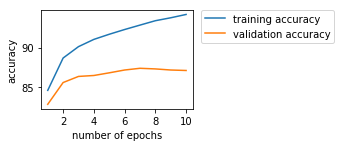

In [156]:
learning_rate = 0.001
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#optimizer= torch.optim.SGD(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

val_acc_list=[]
train_acc_list=[]
for epoch in range(num_epochs):
    #linear annealing of learning rate at every 4th epoch
    if epoch%3==2:
       optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate*0.5)
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            train_acc= test_model(train_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    val_acc_list.append(val_acc)
    train_acc_list.append(train_acc)
    
import matplotlib.pyplot as plt
%matplotlib inline

epochs=[i for i in range(1,num_epochs+1)]

plt.subplot(223)
plt.plot( epochs,train_acc_list, label="training accuracy")
plt.plot( epochs, val_acc_list, label="validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("number of epochs")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [157]:
print ("After training for {} epochs".format(num_epochs))
print("Train Acc {}".format(test_model(train_loader, model)))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 10 epochs
Train Acc 94.32
Val Acc 87.1
Test Acc 84.868


In [276]:
#function to print 3 correctly and incorrectly classified examples

import random

def print3(loader, model):
    correct = 0
    total = 0
    
    #variable to count correctly classified and printed
    c=0
    
    #variable to count incorrectly classified and printed
    ic=0
    model.eval()
    loop_count=0
    for data, lengths, labels in loader:
        #print(labels.shape)
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        #variable to decide whether to consider this batch or not
        this=random.randint(0,1)
        
        if this==1:
            if c<3:
                for i in range(len(predicted)):
                    if predicted[i]==label_batch[i] and c<3:
                        print("Correctly Classified no."+str(c+1))
                        review=""
                        for id in data_batch[i]:
                            review+=id2token[id.item()]+" "
                            #print(id)
                        print("Review:",review)
                        if labels[i].item()==1:
                            ans="pos"
                        else:
                            ans="neg"
                        print("Actual label:",ans)
                        if predicted[i].item()==1:
                            ans="pos"
                        else:
                            ans="neg"
                        print("Predicted label:",ans,"\n\n")
                        c+=1
            if ic<3:
                for i in range(len(predicted)):
                    if predicted[i]!=label_batch[i] and ic<3:
                        print("Incorrectly classified no."+str(ic+1))
                        review=""
                        for id in data_batch[i]:
                            review+=id2token[id.item()]+" "
                            #print(id)
                        print("Review:",review)
                        if label_batch[i].item()==1:
                            ans="pos"
                        else:
                            ans="neg"
                        print("Actual label:",ans)
                        if predicted[i].item()==1:
                            ans="pos"
                        else:
                            ans="neg"
                        print("Predicted label:",ans,"\n\n")
                        ic+=1
        if ic==3 and c==3:
            break
        loop_count+=1
    
    
    

In [278]:
print3(val_loader,model)

Correctly Classified no.1
Review: 1st watch <unk> 4 out of <unk> jim <unk> brian smith drab and un spectacular suppos sequel to the origin classic anim 101 dalmatian ye the movi continu where it end in the first one but the problem is that it play out much like the origin one of the great thing about the origin wa the pace of the stori which thi one doe n't have the anim is also veri un spectacular for disney and all we get is the same charact go thru the same kind of stori all over again when is disney go to stop bore us with sequel and re do 's etc .. etc probabl when we stop rent or buy thi mediocr fare that they have put out <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa